# HSIC and Tangent Kernel Alignment

In [1]:
import sys, os
import warnings
import tqdm
import random
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

# Insert path to model directory,.
path = f"{os.getcwd()}/../../src"
sys.path.insert(0, path)

# toy datasets
from data.toy import generate_dependence_data

# Kernel Dependency measure
from models.dependence import HSIC, train_rbf_hsic

# RBIG IT measures
from models.ite_algorithms import run_rbig_models

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

## Data


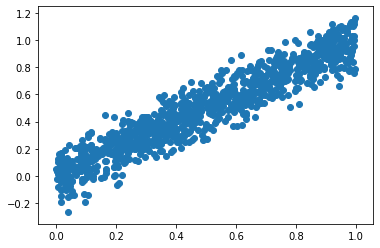

In [2]:
# data params
dataset = 'line'
num_points = 1000
seed = 123
noise = 0.1

# get dataset
X, Y = generate_dependence_data(
    dataset=dataset,
    num_points=num_points,
    seed=seed,
    noise_x=noise,
    noise_y=noise
)

# plot
fig, ax = plt.subplots()

ax.scatter(X, Y)
plt.show()

## HSIC

### Original HSIC 

In [3]:
# hsic params
kernel = 'rbf'
scorer = 'hsic'
subsample = None
bias = True

# initialize HSIC calculator
clf_hsic = HSIC(
    kernel=kernel, 
    scorer=scorer, 
    subsample=subsample,
    bias=bias
)

# calculate HSIC return scorer
clf_hsic.fit(X, Y);

# hsic value and kernel alignment score
hsic_val = clf_hsic.hsic_value

print(f"HSIC: {hsic_val:.5f}")

HSIC: 0.01415


### Kernel Tangent Alignment

In [4]:
# hsic params
kernel = 'rbf'
scorer = 'tka'
subsample = None
bias = True

# initialize HSIC calculator
clf_hsic = HSIC(
    kernel=kernel, 
    scorer=scorer, 
    subsample=subsample,
    bias=bias
)


# calculate HSIC return scorer
clf_hsic.fit(X, Y);

# hsic value and kernel alignment score
tka_val = clf_hsic.hsic_value

print(f"TKA: {tka_val:.5f}")

TKA: 0.99573


#### Centered Kernel Tangent Alignment

In [5]:
# hsic params
kernel = 'rbf'
scorer = 'ctka'
subsample = None
bias = True

# initialize HSIC calculator
clf_hsic = HSIC(
    kernel=kernel, 
    scorer=scorer, 
    subsample=subsample,
    bias=bias
)


# calculate HSIC return scorer
clf_hsic.fit(X, Y);

# hsic value and kernel alignment score
tka_val = clf_hsic.hsic_value

print(f"TKA: {tka_val:.5f}")

TKA: 0.89475


## Training: Maximizing HSIC Values

The code below showcases an easy way to find the best kernel parameters by maximizing the HSIC value. This can be done with cross validation and the automatic training helper function found below.

#### HSIC

In [9]:
# hsic params
kernel = 'rbf'
scorer = 'hsic'
subsample = None
bias = True

# initialize HSIC calculator
clf_hsic = HSIC(
    kernel=kernel, 
    scorer=scorer, 
    subsample=subsample,
    bias=bias
)

# HSIC train parameters
n_gamma = 1000
sigma_est = 'mean'
factor = 1
verbose = 1
n_jobs = -1
cv = 2

# calculate HSIC return scorer
clf_hsic = train_rbf_hsic(
    X, Y, 
    clf_hsic, 
    n_gamma=n_gamma, 
    factor=factor, 
    sigma_est=sigma_est, 
    verbose=verbose, 
    n_jobs=n_jobs, 
    cv=cv
)

# hsic value and kernel alignment score
hsic_val = clf_hsic.hsic_value

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    1.1s


Best HSIC score: 9.315e-02
gamma: 12.775


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.0s finished


In [10]:
clf_hsic.gamma

12.775485451762533

#### TKA

In [7]:
# hsic params
kernel = 'rbf'
scorer = 'tka'
subsample = None
bias = True

# initialize HSIC calculator
clf_hsic = HSIC(
    kernel=kernel, 
    scorer=scorer, 
    subsample=subsample,
    bias=bias
)

# HSIC train parameters
n_gamma = 1000
sigma_est = 'mean'
factor = 1
verbose = 1
n_jobs = -1
cv = 2

# calculate HSIC return scorer
clf_hsic = train_rbf_hsic(
    X, Y, 
    clf_hsic, 
    n_gamma=n_gamma, 
    factor=factor, 
    sigma_est=sigma_est, 
    verbose=verbose, 
    n_jobs=n_jobs, 
    cv=cv
)
# hsic value and kernel alignment score
hsic_val = clf_hsic.hsic_value

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.


Best TKA score: 1.000e+00
gamma: 0.005


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    2.0s finished


#### cTKA

In [8]:
# hsic params
kernel = 'rbf'
scorer = 'ctka'
subsample = None
bias = True

# initialize HSIC calculator
clf_hsic = HSIC(
    kernel=kernel, 
    scorer=scorer, 
    subsample=subsample,
    bias=bias
)

# HSIC train parameters
n_gamma = 1000
sigma_est = 'mean'
factor = 1
verbose = 1
n_jobs = -1
cv = 2

# calculate HSIC return scorer
clf_hsic = train_rbf_hsic(
    X, Y, 
    clf_hsic, 
    n_gamma=n_gamma, 
    factor=factor, 
    sigma_est=sigma_est, 
    verbose=verbose, 
    n_jobs=n_jobs, 
    cv=cv
)

# hsic value and kernel alignment score
hsic_val = clf_hsic.hsic_value

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


Best CTKA score: 8.948e-01
gamma: 0.906


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    2.7s finished
